# 1. Get Summary Statistics

First, let's borrow some data from the [UC Irvine Machine Learning Repository][data].

[data]: https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [1]:
import pandas as pd

mpg_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
    sep='\s+',
    na_values="?",
    header=None,
    names=['mpg', 'cylinders', 'displacement', 'horsepower',
           'weight', 'acceleration', 'model_year', 'origin', 'name']
)
mpg_data["origin"] = mpg_data["origin"].map({1: "usa", 2: "japan", 3: "europe"})
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


In [2]:
from eda_report import summarize

summarize(mpg_data)

			OVERVIEW
Numeric features: mpg, cylinders, displacement, horsepower, weight, acceleration, model_year
Categorical features: origin, name

	  Summary Statistics (Numeric features)
	  -------------------------------------
              count       mean       std     min       25%     50%       75%  \
mpg           398.0    23.5146    7.8160     9.0    17.500    23.0    29.000   
cylinders     398.0     5.4548    1.7010     3.0     4.000     4.0     8.000   
displacement  398.0   193.4259  104.2698    68.0   104.250   148.5   262.000   
horsepower    392.0   104.4694   38.4912    46.0    75.000    93.5   126.000   
weight        398.0  2970.4246  846.8418  1613.0  2223.750  2803.5  3608.000   
acceleration  398.0    15.5681    2.7577     8.0    13.825    15.5    17.175   
model_year    398.0    76.0101    3.6976    70.0    73.000    76.0    79.000   

                 max  skewness  kurtosis  
mpg             46.6    0.4571   -0.5108  
cylinders        8.0    0.5269   -1.3767  
displac

In [3]:
summarize(mpg_data["acceleration"])

[WARNING 17:29:02.197] Skipped Bivariate Analysis: There are less than 2 numeric variables having > 5% unique values.


		Overview
Name: acceleration
Type: numeric
Unique Values: 95 -> [8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.1, [...]
Missing Values: None

	  Summary Statistics
	  ------------------
                                  
Number of observations  398.000000
Average                  15.568090
Standard Deviation        2.757689
Minimum                   8.000000
Lower Quartile           13.825000
Median                   15.500000
Upper Quartile           17.175000
Maximum                  24.800000
Skewness                  0.278777
Kurtosis                  0.419497

	  Tests for Normality
	  -------------------
                               p-value Conclusion at α = 0.05
D'Agostino's K-squared test  0.0220603  Unlikely to be normal
Kolmogorov-Smirnov test      0.0000000  Unlikely to be normal
Shapiro-Wilk test            0.0398724  Unlikely to be normal

In [4]:
summarize(mpg_data["origin"])

[WARNING 17:29:02.346] Skipped Bivariate Analysis: There are less than 2 numeric variables having > 5% unique values.


		Overview
Name: origin
Type: categorical
Number of Observations: 398
Unique Values: 3 -> ['europe', 'japan', 'usa']
Missing Values: None

	  Most Common Items
	  -----------------
                    
usa     249 (62.56%)
europe   79 (19.85%)
japan    70 (17.59%)

# 2. Visualize Data

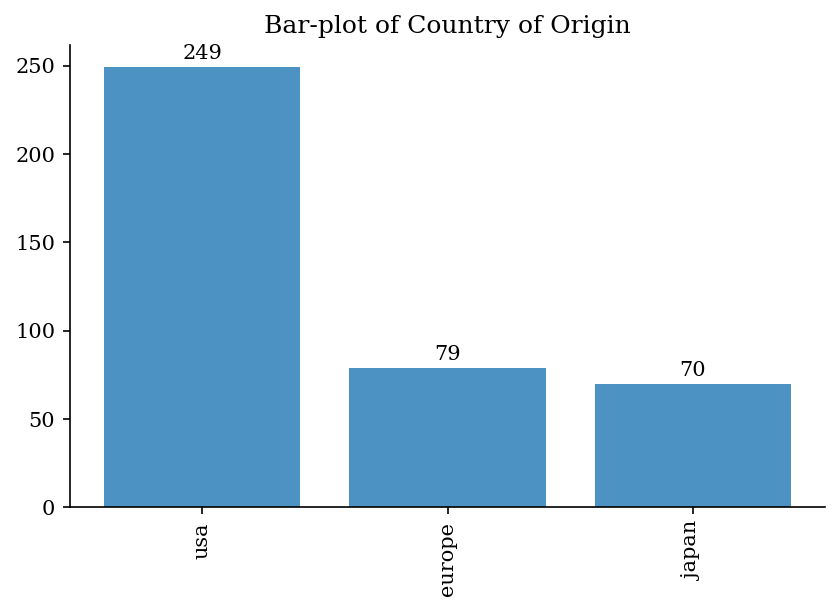

In [5]:
# Display figures direclty below cells
%matplotlib inline

import matplotlib as mpl
mpl.rc("figure", autolayout=False)  # Suppress IPython tight_layout warnings

import eda_report.plotting as ep

ep.bar_plot(mpg_data["origin"], label="Country of Origin")

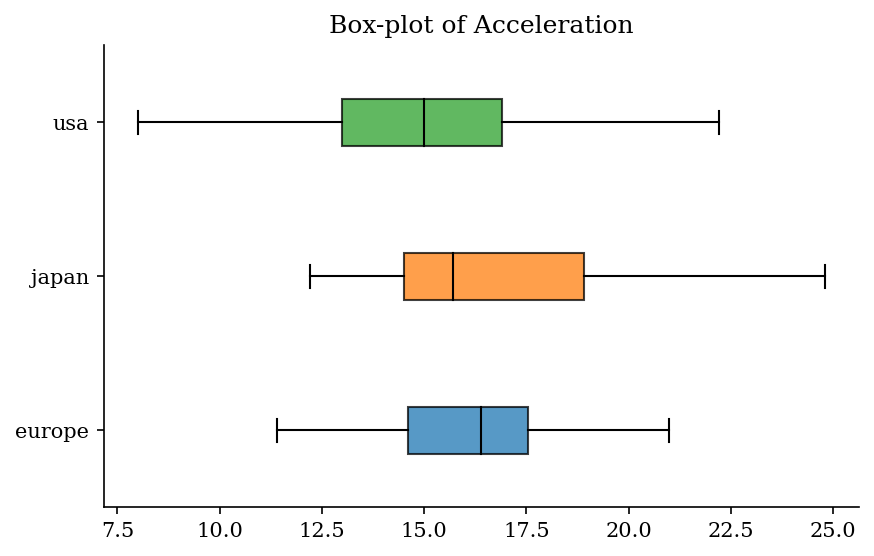

In [6]:
ep.box_plot(mpg_data["acceleration"], label="Acceleration", hue=mpg_data["origin"])

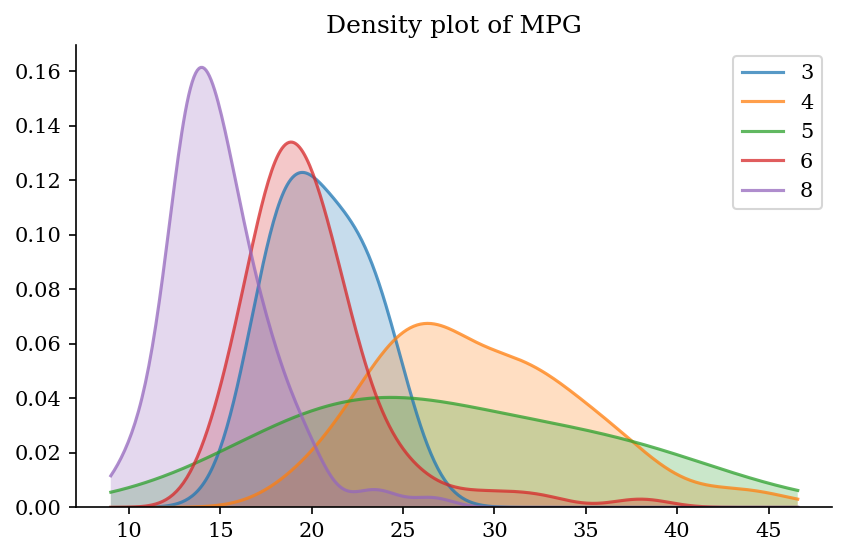

In [7]:
ep.kde_plot(mpg_data["mpg"], label="MPG", hue=mpg_data["cylinders"])

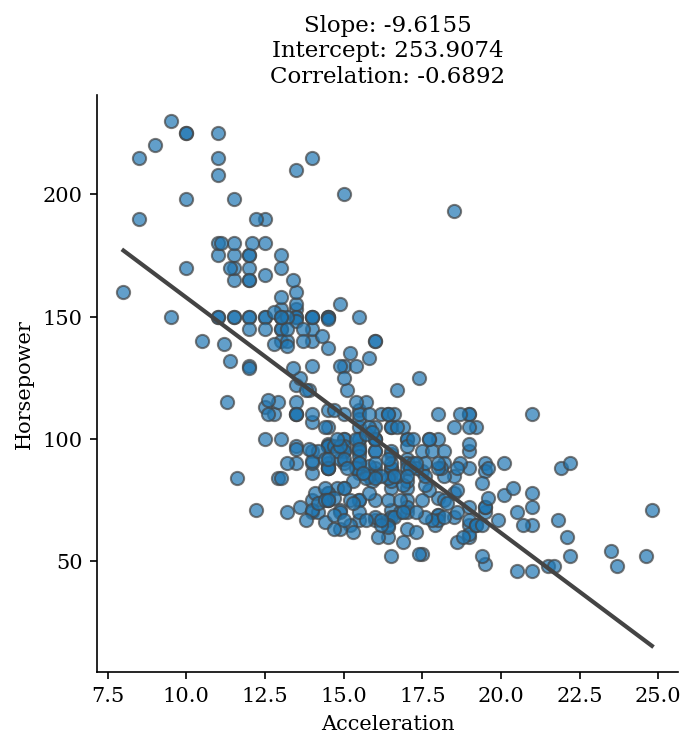

In [8]:
ep.regression_plot(mpg_data["acceleration"], mpg_data["horsepower"],
                   labels=("Acceleration", "Horsepower"))

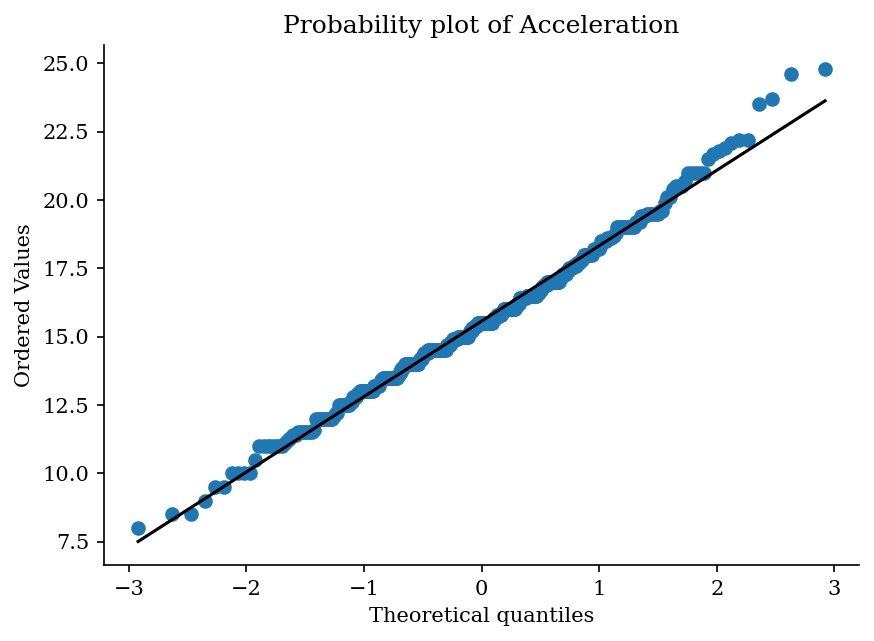

In [9]:
ep.prob_plot(mpg_data["acceleration"], label="Acceleration")

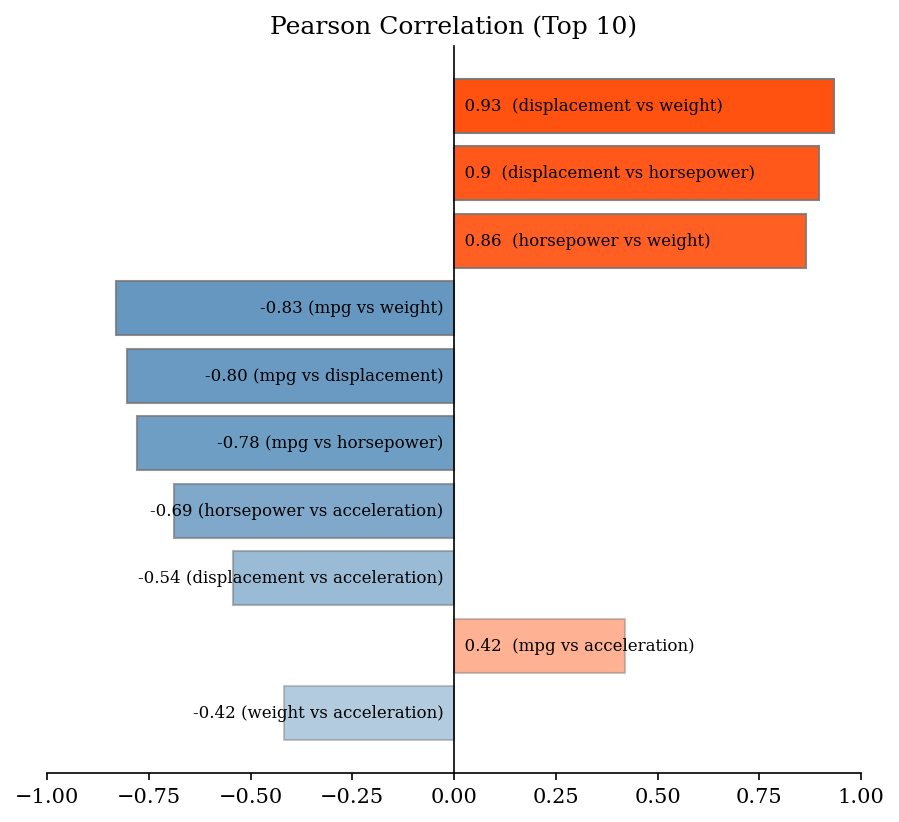

In [10]:
ep.plot_correlation(mpg_data)

# 3. Generate a Report Document

In [11]:
from eda_report import get_word_report

file_name = "mpg-report.docx"
report = get_word_report(mpg_data, output_filename=file_name)

Analyze variables:  100%|███████████████████████████████████| 9/9
Plot variables:     100%|███████████████████████████████████| 9/9
Bivariate analysis: 100%|███████████████████████████████████| 10/10 pairs.
[INFO 17:29:06.746] Done. Results saved as 'mpg-report.docx'


In [12]:
from IPython.display import FileLink

FileLink(file_name)  # Get link to the generated report

/home/tim/Projects/eda-report/mpg-report.docx